# ***Đồ án môn học Nhập môn Phân tích dữ liệu và Học sâu***

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Hàm tải dữ liệu
def load_data(file_path):
    """Đọc dữ liệu từ file CSV."""
    df = pd.read_csv(file_path)
    return df
file_path = "vietnam_housing_dataset.csv"
df = load_data(file_path)


# **Mô tả dữ liệu**

In [4]:
def describe_data(df, message):
    """Mô tả dữ liệu: thông tin tổng quan và thống kê."""
    print(f"\n{message}")
    print(df.info())
    print(df.describe())

def handle_missing_values(df, selected_features):
    """Loại bỏ hoặc điền dữ liệu thiếu."""
    df_selected = df[selected_features + ["Price"]].dropna()
    return df_selected

def remove_outliers(df, columns, threshold=1.5):
    """Loại bỏ ngoại lệ dựa trên IQR."""
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    mask = ~((df[columns] < (Q1 - threshold * IQR)) | (df[columns] > (Q3 + threshold * IQR))).any(axis=1)
    return df[mask]

def normalize_data(X_train, X_test):
    """Chuẩn hóa dữ liệu bằng StandardScaler."""
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, X_test, scaler

def main():
    file_path = "vietnam_housing_dataset.csv"
    df = load_data(file_path)
    describe_data(df, "Dữ liệu trước khi xử lý")

    # Chọn các đặc trưng cần sử dụng
    selected_features = ["Area", "Frontage", "Access Road", "Floors", "Bedrooms", "Bathrooms"]
    df_clean = handle_missing_values(df, selected_features)
    df_clean = remove_outliers(df_clean, selected_features)
    
    describe_data(df_clean, "Dữ liệu sau khi xử lý")
    
    # Chia dữ liệu thành tập train/test
    X = df_clean[selected_features].values
    y = df_clean["Price"].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Chuẩn hóa dữ liệu
    X_train, X_test, scaler = normalize_data(X_train, X_test)
    
    print("Xử lý dữ liệu hoàn tất!")

if __name__ == "__main__":
    main()



Dữ liệu trước khi xử lý
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30229 entries, 0 to 30228
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Address            30229 non-null  object 
 1   Area               30229 non-null  float64
 2   Frontage           18665 non-null  float64
 3   Access Road        16932 non-null  float64
 4   House direction    8990 non-null   object 
 5   Balcony direction  5246 non-null   object 
 6   Floors             26626 non-null  float64
 7   Bedrooms           25067 non-null  float64
 8   Bathrooms          23155 non-null  float64
 9   Legal status       25723 non-null  object 
 10  Furniture state    16110 non-null  object 
 11  Price              30229 non-null  float64
dtypes: float64(7), object(5)
memory usage: 2.8+ MB
None
               Area      Frontage   Access Road        Floors      Bedrooms  \
count  30229.000000  18665.000000  16932.000000  26626.000

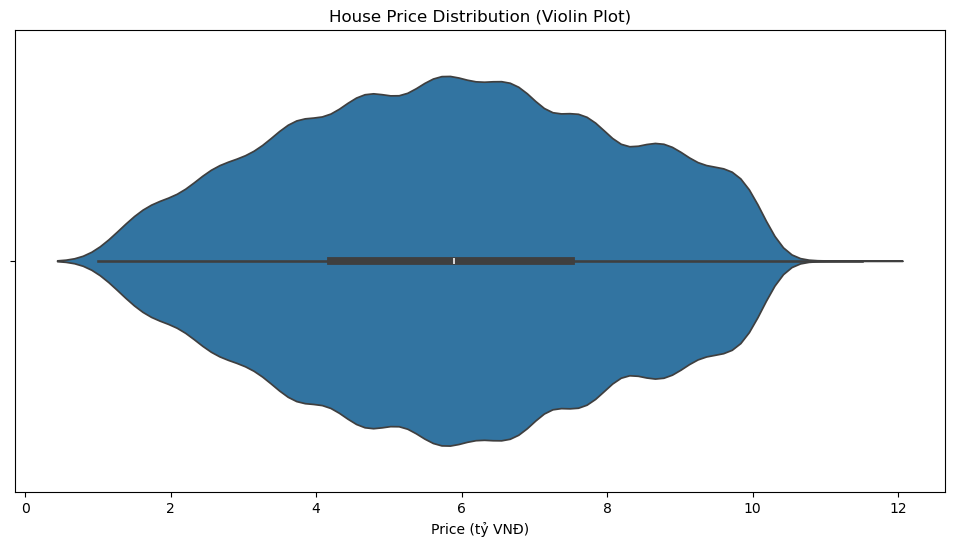

In [5]:
# Biểu đồ phân phối giá nhà violinplot
plt.figure(figsize=(12, 6))
sns.violinplot(x=df["Price"])
plt.title("House Price Distribution (Violin Plot)")
plt.xlabel("Price (tỷ VNĐ)")
plt.show()

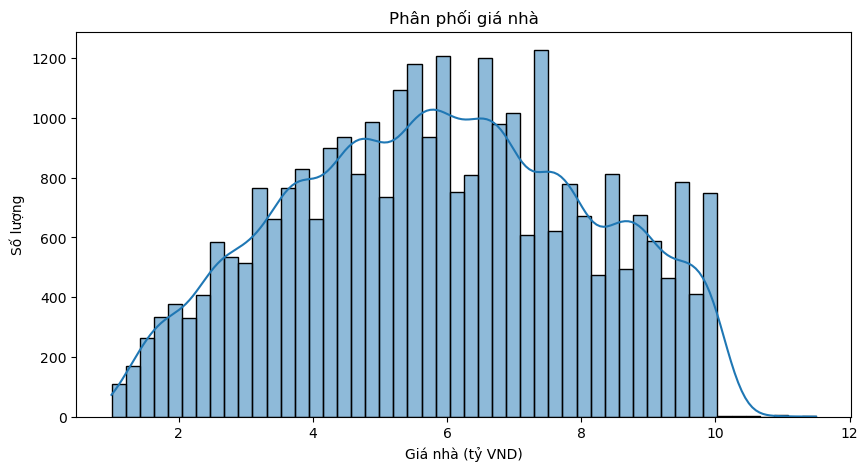

In [6]:
# Biểu đồ phân phối giá nhà
plt.figure(figsize=(10,5))
sns.histplot(df["Price"], bins=50, kde=True)
plt.xlabel("Giá nhà (tỷ VND)")
plt.ylabel("Số lượng")
plt.title("Phân phối giá nhà")
plt.show()

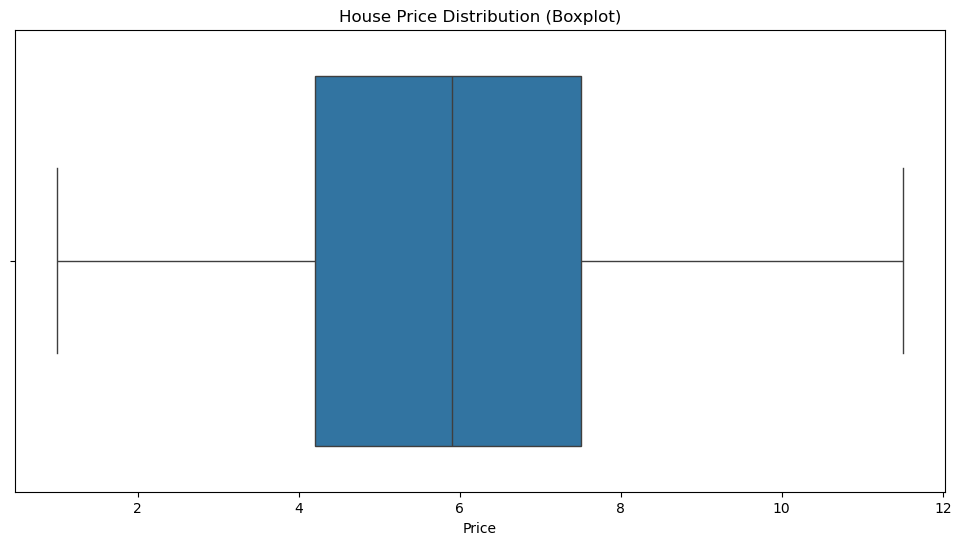

In [7]:
# Biểu đồ phân phối giá nhà dạng boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["Price"])
plt.title("House Price Distribution (Boxplot)")
plt.show()

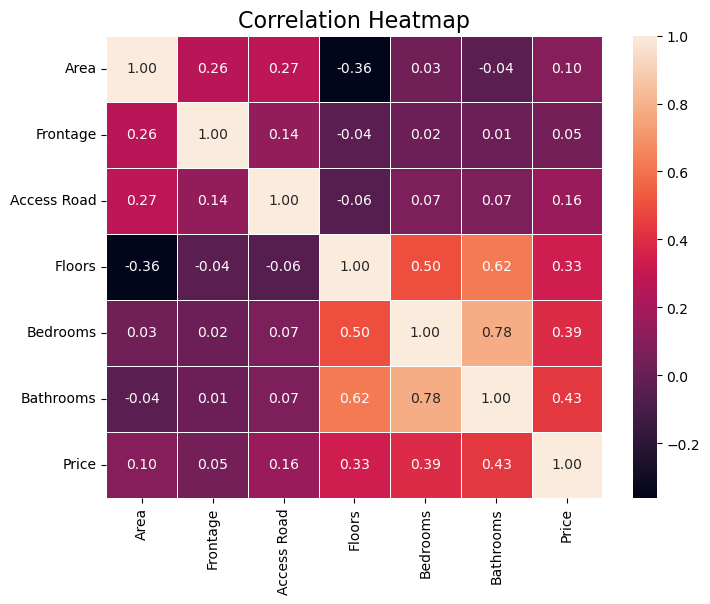

In [8]:
#Biểu đồ Correlation Heatmap
numerical_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", linewidths=0.5, cbar=True)

plt.title("Correlation Heatmap", fontsize=16)
plt.show()

# ***Phân loại***

In [9]:
#Kiểm tra dữ liệu null
df.isnull().sum()

Address                  0
Area                     0
Frontage             11564
Access Road          13297
House direction      21239
Balcony direction    24983
Floors                3603
Bedrooms              5162
Bathrooms             7074
Legal status          4506
Furniture state      14119
Price                    0
dtype: int64

In [10]:
#Loại bỏ các dữ liệu null
df.fillna({"Legal status": "None", "Furniture state": "None"}, inplace=True)
df.drop("House direction", inplace = True, axis = 1)
df.drop("Balcony direction", inplace = True, axis = 1)

In [11]:
#Tạo ra hai cột Province và Project
df["Province"] = df["Address"].str.split(", ").str[-1].str.replace(".", "")
df["Project"] = df["Address"].str.lower().str.contains("dự án").map({True: 1, False: 0})

df.head()

,Address,Area,Frontage,Access Road,Floors,Bedrooms,Bathrooms,Legal status,Furniture state,Price,Province,Project
0,"Dự án The Empire - Vinhomes Ocean Park 2, Xã L...",84.0,NaN,NaN,4.0,NaN,NaN,Have certificate,None,8.60,Hưng Yên,1
1,"Dự án The Crown - Vinhomes Ocean Park 3, Xã Ng...",60.0,NaN,NaN,5.0,NaN,NaN,None,None,7.50,Hưng Yên,1
2,"Dự án The Crown - Vinhomes Ocean Park 3, Xã Ng...",90.0,6.0,13.0,5.0,NaN,NaN,Sale contract,None,8.90,Hưng Yên,1
3,"Đường Nguyễn Văn Khối, Phường 11, Gò Vấp, Hồ C...",54.0,NaN,3.5,2.0,2.0,3.0,Have certificate,Full,5.35,Hồ Chí Minh,0
4,"Đường Quang Trung, Phường 8, Gò Vấp, Hồ Chí Minh",92.0,NaN,NaN,2.0,4.0,4.0,Have certificate,Full,6.90,Hồ Chí Minh,0


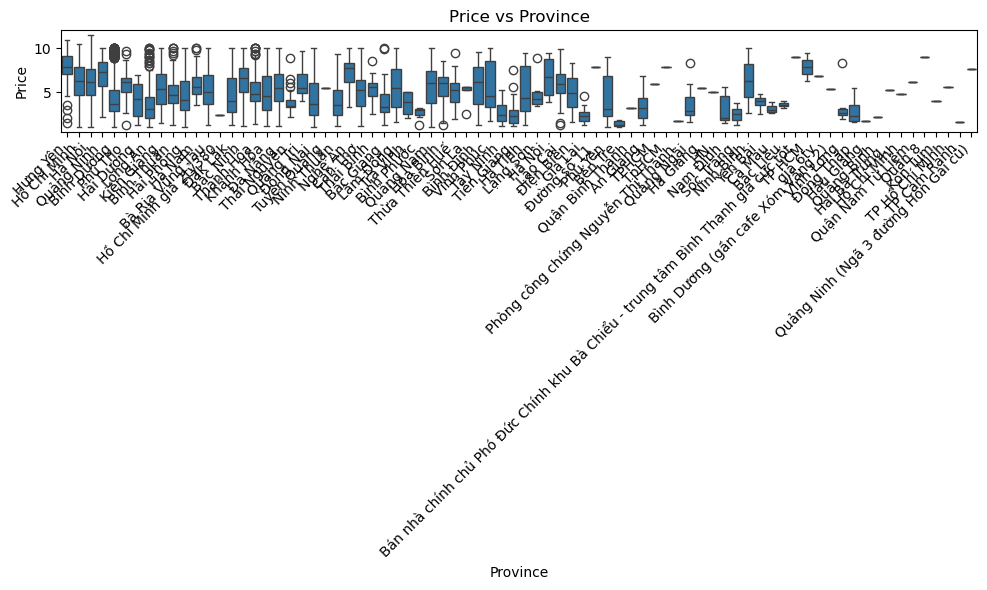

In [12]:
#Tạo boxplot phân tích Price vs Province
plt.figure(figsize=(10, 6))
sns.boxplot(x="Province", y="Price", data=df)
plt.title("Price vs Province")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()

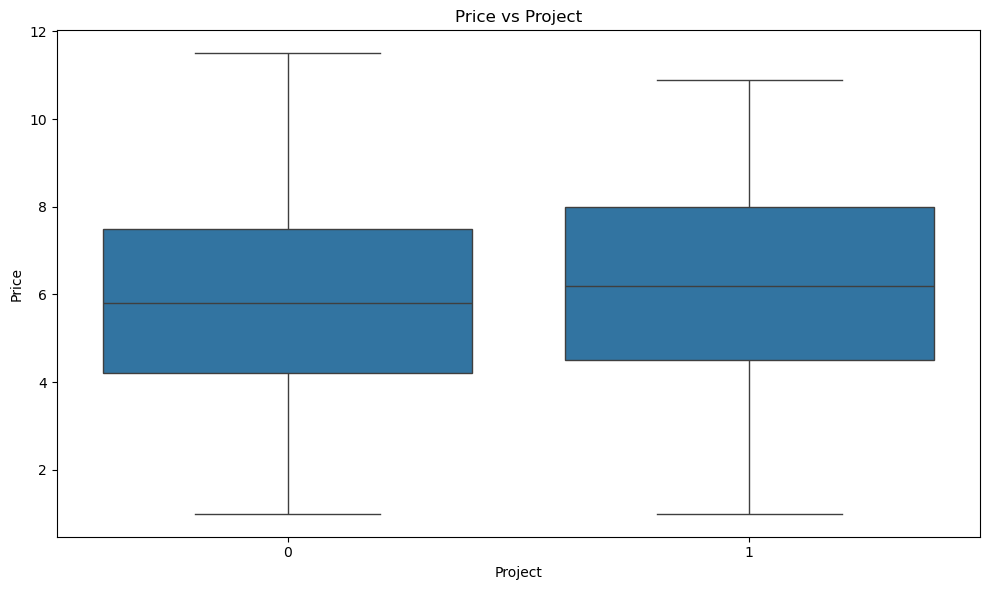

In [13]:
#Tạo boxplot phân tích Price vs Project
plt.figure(figsize=(10, 6))
sns.boxplot(x="Project", y="Price", data=df)
plt.title("Price vs Project")

plt.tight_layout()
plt.show()

In [14]:
#Lưu dữ liệu đã xử lý vào csv mới
df.to_csv("vietnam_housing_dataset_cleaned_data.csv", index=False)
print("Cleaned data saved as vietnam_housing_dataset_cleaned_data.csv")

Cleaned data saved as vietnam_housing_dataset_cleaned_data.csv
